# Support Vector Machines (svm) - Clasificación
<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

La idea intuitiva de lo que hace Support Vector Machines (svm) se puede ilustrar por medio de la siguiente figura.

<img src="https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/imagenes/SVM_1.png" alt="drawing" width="400">

## Truco del kernel

En algunos casos es necesario transformar los datos para poder encontrar una separación óptima.

<img src="https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/imagenes/svm_kernel_trick.png" alt="drawing" width="500">

Los 4 kernel usuales son:

<li>linear: <span class="math">\(\langle x, x'\rangle\)</span>.</li>
<li>polynomial: <span class="math">\((\gamma \langle x, x'\rangle + r)^d\)</span>.
<span class="math">\(d\)</span> is specified by keyword <code class="docutils literal"><span class="pre">degree</span></code>, <span class="math">\(r\)</span> by <code class="docutils literal"><span class="pre">coef0</span></code>.</li>
<li>rbf (radial basis function): <span class="math">\(\exp(-\gamma \|x-x'\|^2)\)</span>. <span class="math">\(\gamma\)</span> is specified by keyword <code class="docutils literal"><span class="pre">gamma</span></code>, must be greater than 0.</li>
<li>sigmoid (<span class="math">\(\tanh(\gamma \langle x,x'\rangle + r)\)</span>),

# Objetivo
En este ejemplo se busca crear un clasificador de flores basado en la longitud y ancho del pétalo y sépalo, abajo una figura ilustrativa del problema.

<img src="https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/imagenes/iris.png" alt="drawing" width="900">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
## Los datos

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris['data'].shape

(150, 4)

In [6]:
iris['data'][0:4, ]  # Para ver las primeras 5 observaciones

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Creación de los datos de entrenamiento (train) y de validación (test)
Para particionar los datos originales se usa la función `train_test_split`, para mayores detalles se recomienda consultar los parámetros de la función se recomienda consultar este [enlace](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[: , [0,1]], iris['target'], test_size=0.25)

In [10]:
print('Información del conjunto de Train')
print(X_train.shape)
print(y_train.shape)
print('Información del conjunto de Test')
print(X_test.shape)
print(y_test.shape)

Información del conjunto de Train
(112, 2)
(112,)
Información del conjunto de Test
(38, 2)
(38,)


## Diagrama de dispersión

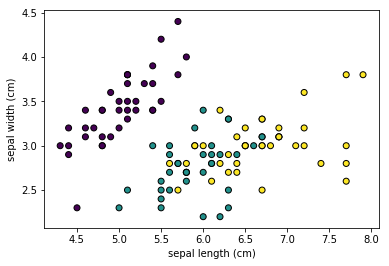

In [11]:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## Ajuste del modelo
Para crear el modelo se usa la función `sklearn.svm.SVC`, para mayores detalles se recomienda consultar los parámetros de la función se recomienda consultar este [enlace](https://scikit-learn.org/0.16/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [29]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model_fit = model.fit(X=X_train, y=y_train)

Para obtener la tabla de confusión hacemos lo siguiente:

In [30]:
import pandas as pd
t1 = pd.crosstab(index=model.predict(X_test), columns=y_test, rownames=['Prediccion'], colnames=['Membresía'])
t1

Membresía,0,1,2
Prediccion,,,
0,12,0,0
1,0,8,6
2,0,6,6


Para calcular las tasas de clasificación correcta con Train y Test usamos:

In [31]:
model.score(X=X_train, y=y_train)

0.8660714285714286

In [32]:
model.score(X=X_test, y=y_test)

0.6842105263157895

No handles with labels found to put in legend.


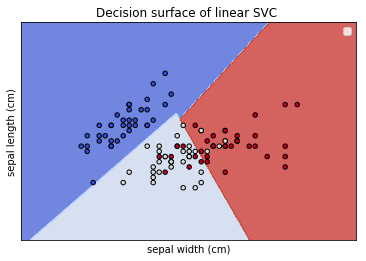

In [34]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model_fit, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()